In [4]:
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import fdrcorrection
import numpy as np
from nilearn import input_data, plotting,datasets
import matplotlib.pyplot as plt
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
import matplotlib.gridspec as gridspec
import seaborn as sns


In [5]:
dataset = datasets.fetch_atlas_basc_multiscale_2015()
atlas_filename = dataset.scale444
masker = input_data.NiftiLabelsMasker(labels_img=atlas_filename,high_pass=0.01 ,standardize=True,t_r=1.49,smoothing_fwhm=8,memory='nilearn_cache')
masker.fit()

NiftiLabelsMasker(high_pass=0.01,
                  labels_img='/home/ani686/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
                  memory='nilearn_cache', smoothing_fwhm=8, standardize=True,
                  t_r=1.49)

In [7]:
for data_subject in [1,2,4,6]:
    print(data_subject)
    other_subjects = [91,92]

    for other_subject in other_subjects:
        trained = np.load('results/main-'+str(data_subject)+'-'+str(0)+'.npy')
        other = np.load('results/main-'+str(data_subject)+'-'+str(other_subject)+'.npy')
        wil_test  = np.zeros((trained.shape[1]))
        for i in range(trained.shape[1]):
            wil_test[i] = wilcoxon(trained[:,i],other[:,i],zero_method="zsplit",alternative = "greater").pvalue
        fdr_val = fdrcorrection(wil_test)
        print(np.where(fdr_val[1]<0.05)[0].shape[0]/444*100)
        #np.save('results/signi-'+str(data_subject)+'-'+str(other_subject)+'.npy',np.where(fdr_val[1]<0.05)[0])

1
63.288288288288285
70.94594594594594
2
35.585585585585584
83.1081081081081
4
73.64864864864865
90.09009009009009
6
46.62162162162162
81.08108108108108


In [107]:
subject=6

In [108]:
trained = np.load('results/main-'+str(subject)+'-'+str(0)+'.npy')
print(np.histogram(trained.mean(axis=0), bins=[0.1, 0.2, 0.3,0.4,0.5])[0])
early = np.load('results/main-'+str(subject)+'-'+str(91)+'.npy')
print(np.histogram(early.mean(axis=0), bins=[0.1, 0.2, 0.3,0.4,0.5])[0])
last = np.load('results/main-'+str(subject)+'-'+str(92)+'.npy')
print(np.histogram(last.mean(axis=0), bins=[0.1, 0.2, 0.3,0.4,0.5])[0])

[36  1  0  0]
[14  0  0  0]
[15  0  0  0]


1.3513513513513513
(6,)


/lustre03/project/6003287/ani686/env/lib/python3.6/site-packages/nilearn/plotting/html_document.py:60: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))



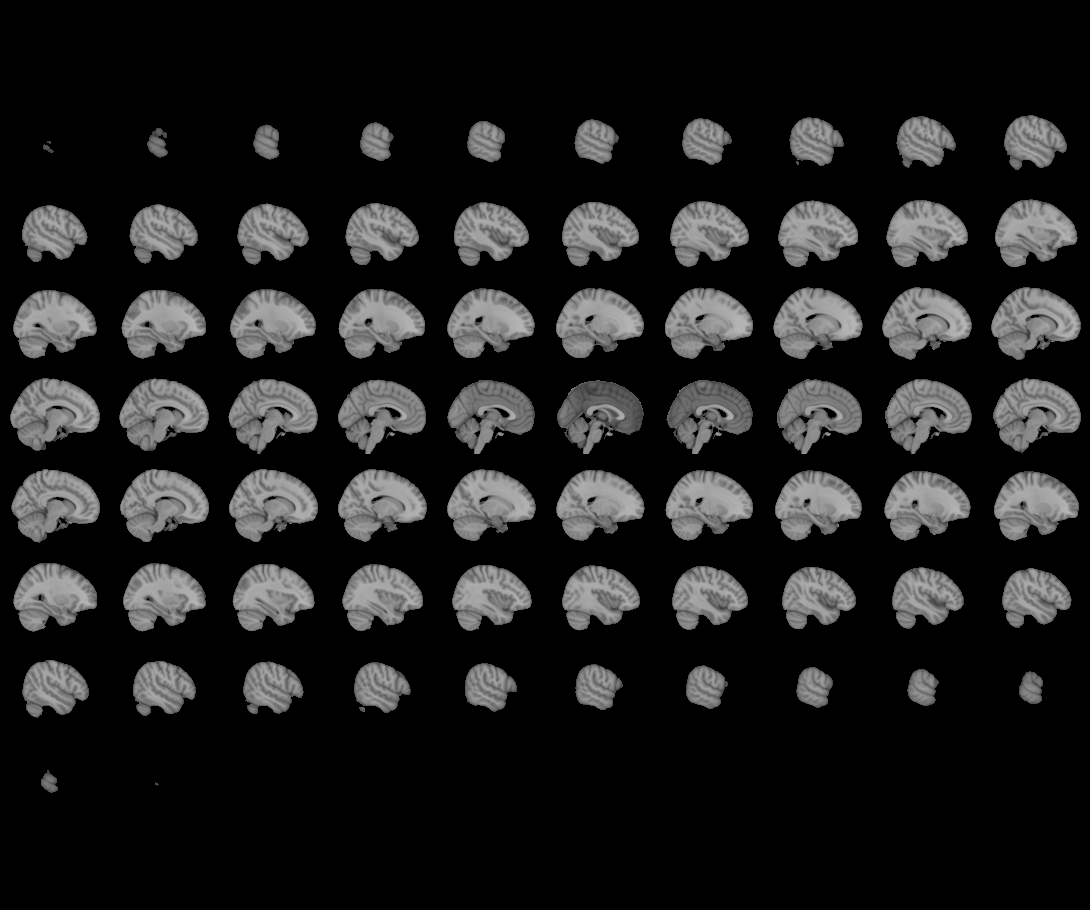
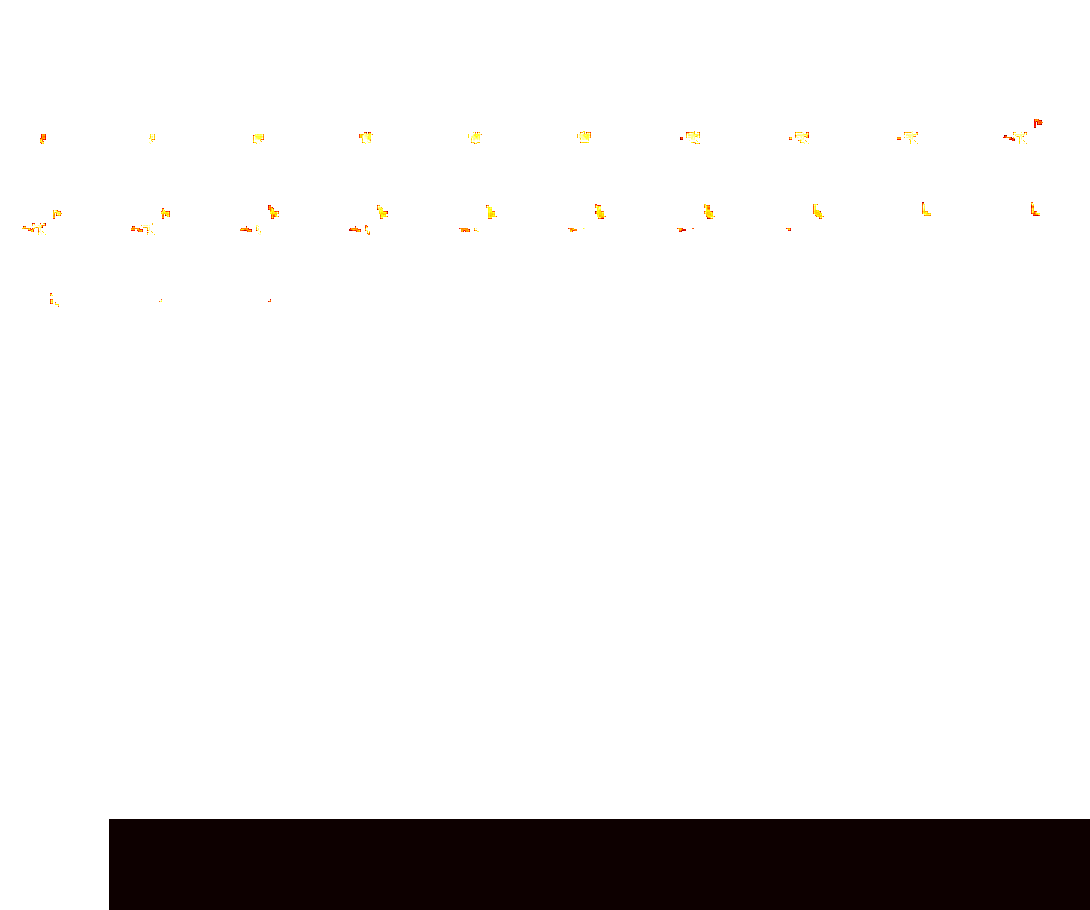

In [109]:
wil_test  = np.zeros((trained.shape[1]))
for i in range(trained.shape[1]):
    wil_test[i] = wilcoxon(last[:,i],early[:,i],zero_method="zsplit",alternative = "greater").pvalue
fdr_val = fdrcorrection(wil_test)
print(np.where(fdr_val[1]<0.05)[0].shape[0]/444*100)
t = np.where(fdr_val[1]<0.05)[0]
print(t.shape)
temp = np.zeros(444)
fintest = last.mean(axis=0) - early.mean(axis=0)
for i in t:
    temp[i]=fintest[i]
masked_img = masker.inverse_transform([temp])
np.save('results/signi-'+str(subject)+'-92-91.npy',np.where(fdr_val[1]<0.05)[0])
plotting.view_img(masked_img)

34.45945945945946
(153,)


/lustre03/project/6003287/ani686/env/lib/python3.6/site-packages/nilearn/plotting/html_document.py:60: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))



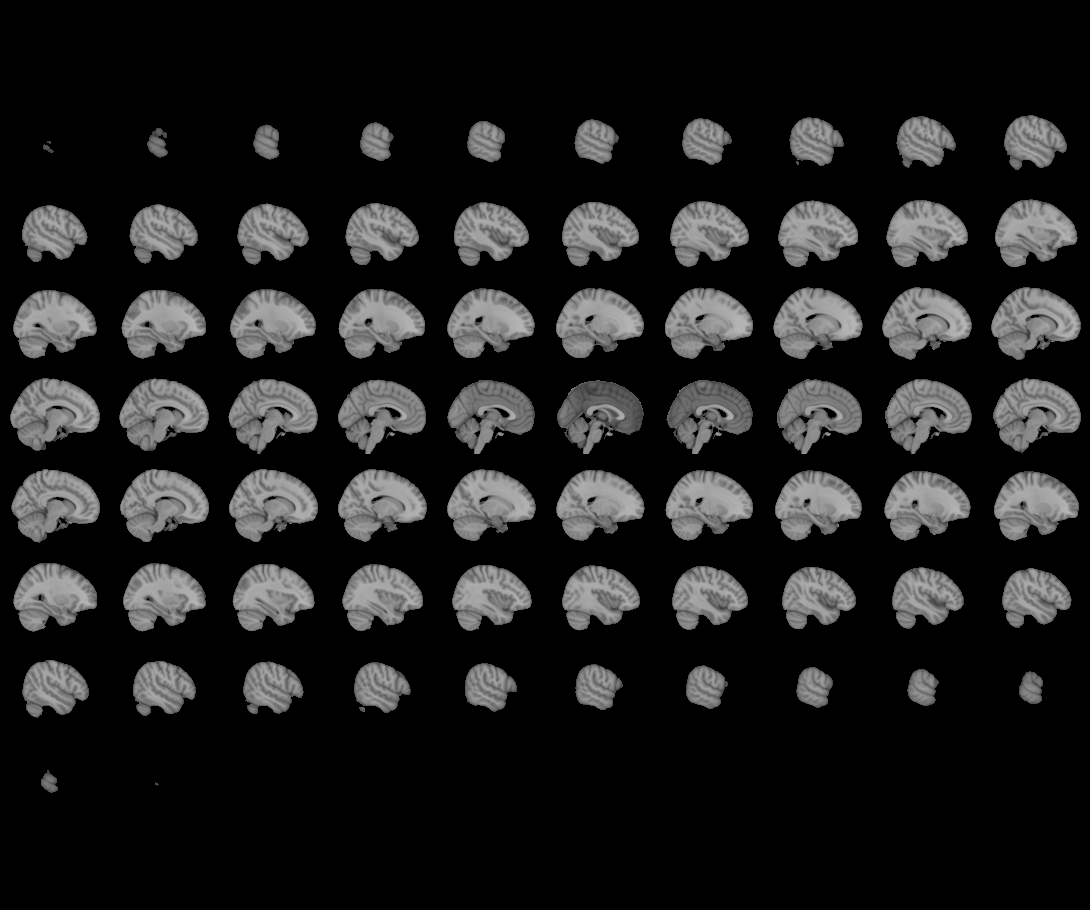
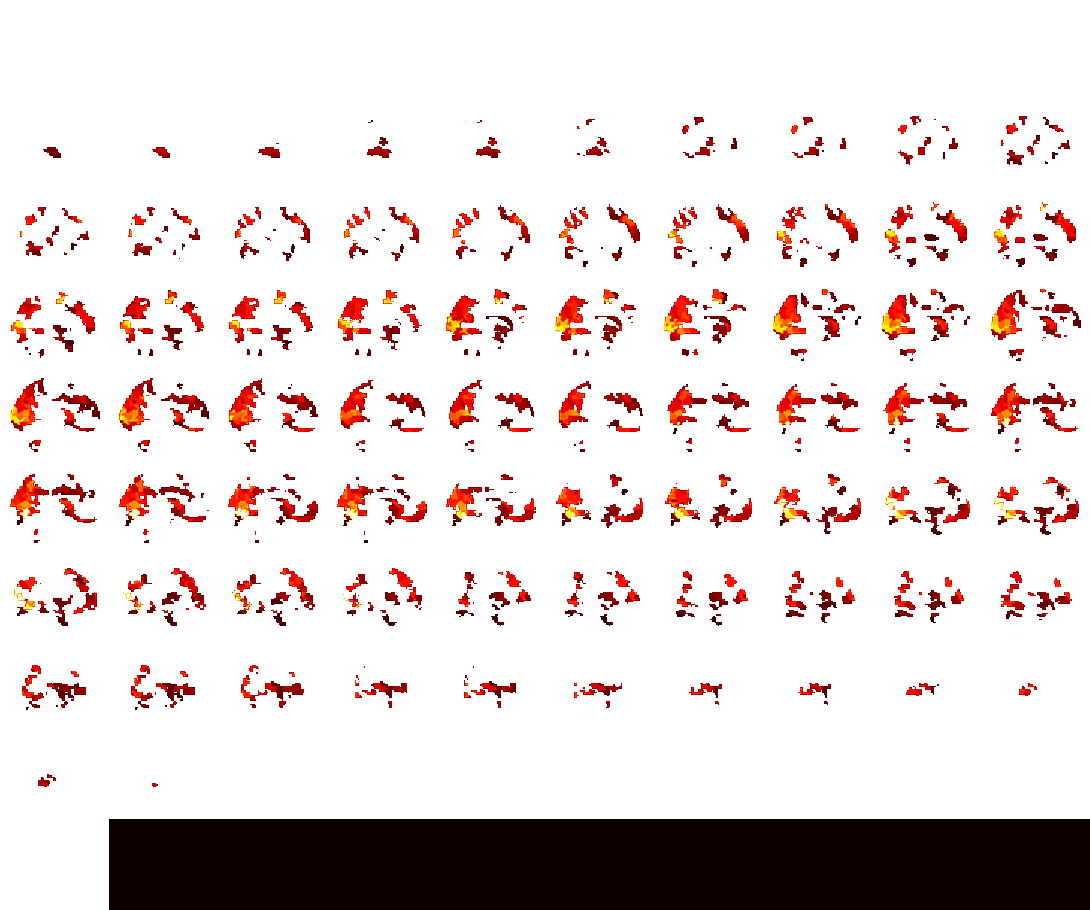

In [110]:
wil_test  = np.zeros((trained.shape[1]))
for i in range(trained.shape[1]):
    wil_test[i] = wilcoxon(early[:,i],last[:,i],zero_method="zsplit",alternative = "greater").pvalue
fdr_val = fdrcorrection(wil_test)
print(np.where(fdr_val[1]<0.05)[0].shape[0]/444*100)
t = np.where(fdr_val[1]<0.05)[0]
print(t.shape)
temp = np.zeros(444)
fintest = early.mean(axis=0) - last.mean(axis=0)
for i in t:
    temp[i]=fintest[i]
masked_img = masker.inverse_transform([temp])
np.save('results/signi-'+str(subject)+'-91-92.npy',np.where(fdr_val[1]<0.05)[0])
plotting.view_img(masked_img)


In [15]:
subject = 1
all_lags =[]
for lag in range(9):
    all_lags.append(np.load('results/subject-'+str(subject)+'-lag-'+str(lag)+'.npy').mean(axis=0))
histogramdata1 = np.concatenate((np.expand_dims(all_lags[0],1),np.expand_dims(all_lags[1],1),np.expand_dims(all_lags[2],1),np.expand_dims(all_lags[3],1),np.expand_dims(all_lags[4],1),np.expand_dims(all_lags[5],1),np.expand_dims(all_lags[6],1),np.expand_dims(all_lags[7],1),np.expand_dims(all_lags[8],1)),axis=1)

subject = 2
all_lags =[]
for lag in range(9):
    all_lags.append(np.load('results/subject-'+str(subject)+'-lag-'+str(lag)+'.npy').mean(axis=0))
histogramdata2 = np.concatenate((np.expand_dims(all_lags[0],1),np.expand_dims(all_lags[1],1),np.expand_dims(all_lags[2],1),np.expand_dims(all_lags[3],1),np.expand_dims(all_lags[4],1),np.expand_dims(all_lags[5],1),np.expand_dims(all_lags[6],1),np.expand_dims(all_lags[7],1),np.expand_dims(all_lags[8],1)),axis=1)


subject = 4
all_lags =[]
for lag in range(9):
    all_lags.append(np.load('results/subject-'+str(subject)+'-lag-'+str(lag)+'.npy').mean(axis=0))
histogramdata4 = np.concatenate((np.expand_dims(all_lags[0],1),np.expand_dims(all_lags[1],1),np.expand_dims(all_lags[2],1),np.expand_dims(all_lags[3],1),np.expand_dims(all_lags[4],1),np.expand_dims(all_lags[5],1),np.expand_dims(all_lags[6],1),np.expand_dims(all_lags[7],1),np.expand_dims(all_lags[8],1)),axis=1)


subject = 6
all_lags =[]
for lag in range(9):
    all_lags.append(np.load('results/subject-'+str(subject)+'-lag-'+str(lag)+'.npy').mean(axis=0))
histogramdata6 = np.concatenate((np.expand_dims(all_lags[0],1),np.expand_dims(all_lags[1],1),np.expand_dims(all_lags[2],1),np.expand_dims(all_lags[3],1),np.expand_dims(all_lags[4],1),np.expand_dims(all_lags[5],1),np.expand_dims(all_lags[6],1),np.expand_dims(all_lags[7],1),np.expand_dims(all_lags[8],1)),axis=1)

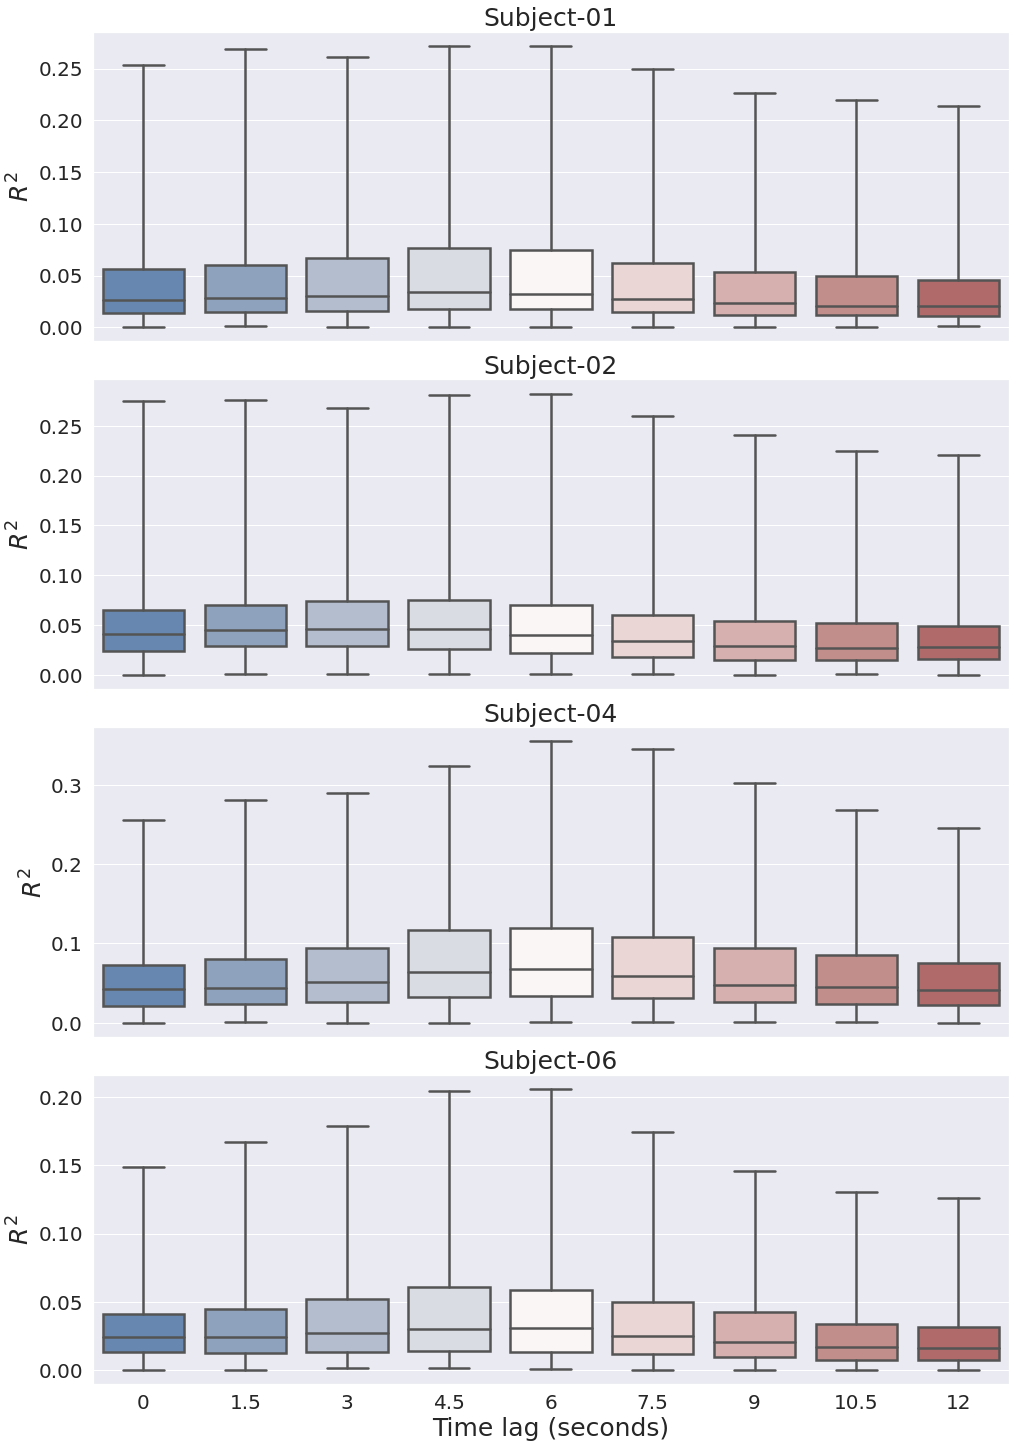

In [17]:
fig = plt.figure(constrained_layout=True,figsize=(14, 20))
gs0 = gridspec.GridSpec(4, 1, figure=fig)
ax0 =  fig.add_subplot(gs0[0])
ax1 =  fig.add_subplot(gs0[1])
ax2 =  fig.add_subplot(gs0[2])
ax3 =  fig.add_subplot(gs0[3])

sns.set_theme(style="darkgrid")


sns.boxplot(data=histogramdata1, whis=10, linewidth=2.5, ax = ax0 ,palette = sns.color_palette("vlag",9))
ax0.set_ylabel(r'$R^{2}$',fontsize=25)
ax0.tick_params(axis='y', labelsize= 20 )
ax0.tick_params(axis='x', labelsize= 20 )
#ax0.set_xticks([0,1,2,3,4,5,6,7,8])
#ax0.set_xticklabels(['0','1.5','3','4.5','6','7.5','9','10.5','12'])
ax0.set_xticklabels([])

ax0.set_title('Subject-01',fontsize=25)


sns.boxplot(data=histogramdata2, whis=10, linewidth=2.5, ax = ax1 ,palette = sns.color_palette("vlag",9))
ax1.set_ylabel(r'$R^{2}$',fontsize=25)
ax1.tick_params(axis='y', labelsize= 20 )
ax1.tick_params(axis='x', labelsize= 20 )
ax1.set_xticks([0,1,2,3,4,5,6,7,8])
ax1.set_title('Subject-02',fontsize=25)

ax1.set_xticklabels([])

sns.boxplot(data=histogramdata4, whis=10, linewidth=2.5, ax = ax2 ,palette = sns.color_palette("vlag",9))
ax2.set_ylabel(r'$R^{2}$',fontsize=25)
ax2.tick_params(axis='y', labelsize= 20 )
ax2.tick_params(axis='x', labelsize= 20 )
ax2.set_title('Subject-04',fontsize=25)

ax2.set_xticks([0,1,2,3,4,5,6,7,8])
ax2.set_xticklabels([])

sns.boxplot(data=histogramdata6, whis=10, linewidth=2.5, ax = ax3 ,palette = sns.color_palette("vlag",9))
ax3.set_ylabel(r'$R^{2}$',fontsize=25)
ax3.set_xlabel('Time lag (seconds)',fontsize=25)
ax3.tick_params(axis='y', labelsize= 20 )
ax3.tick_params(axis='x', labelsize= 20 )
ax3.set_title('Subject-06',fontsize=25)

ax3.set_xticks([0,1,2,3,4,5,6,7,8])
ax3.set_xticklabels(['0','1.5','3','4.5','6','7.5','9','10.5','12'])




plt.savefig('time-lag',dpi=400)
plt.show()

In [ ]:
temp = np.zeros((444))
for i in range(444):
    if fdr_val[1][i]<=0.01:
        temp[i]=1
masked_img = masker.inverse_transform([temp])
plotting.view_img(masked_img,threshold = 0.5,symmetric_cmap=False , resampling_interpolation= "nearest",cmap=nilearn_cmaps["green_transparent"] )